<a href="https://colab.research.google.com/github/chaiminwoo0223/Machine-Learning/blob/main/05_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
# 농어의 길이와 무게
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split                  # 훈련 세트와 테스트 세트 분할(3:1)
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42)

In [4]:
train_input = train_input.reshape(-1,1) # 크기에 -1을 지정하면 나머지 원소로 모두 채운다.
test_input = test_input.reshape(-1,1) # 크기에 -1을 지정하면 나머지 원소로 모두 채운다.

In [7]:
from sklearn.neighbors import KNeighborsRegressor # k - 최근접 이웃 회귀 알고리즘
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input,train_target) # 훈련

KNeighborsRegressor(n_neighbors=3)

In [8]:
print(knr.predict([[50]])) # 예측

[1033.33333333]


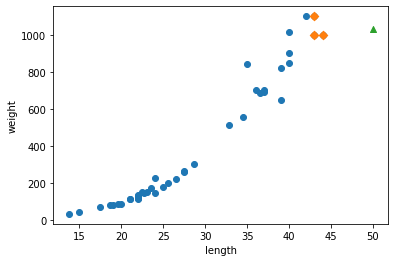

In [9]:
import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
plt.scatter(50,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [14]:
train_target[indexes]

array([[1000., 1000., 1100.]])

In [15]:
print(np.mean(train_target[indexes]))

1033.3333333333333


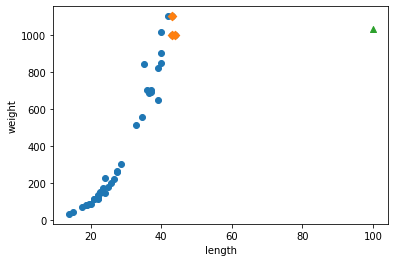

In [18]:
distances, indexes = knr.kneighbors([[100]])
plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
plt.scatter(100,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input,train_target)
print(lr.predict([[50]]))
print(lr.predict([[100]]))

[1241.83860323]
[3192.69585141]


In [22]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.939846333997604
0.8247503123313558


In [23]:
print(lr.coef_,lr.intercept_)

[39.01714496] -709.0186449535477


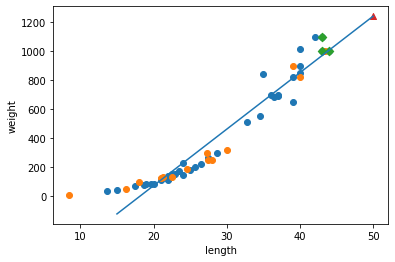

In [27]:
plt.scatter(train_input,train_target)
plt.scatter(test_input,test_target)
plt.plot([15,50],[15*lr.coef_ + lr.intercept_,50*lr.coef_ + lr.intercept_]) # y = aX + b
plt.scatter(train_input[indexes],train_target[indexes],marker='D')
plt.scatter(50,1241.8,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [25]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.939846333997604
0.8247503123313558


In [26]:
train_poly = np.column_stack((train_input**2,train_input))
test_poly = np.column_stack((test_input**2,test_input))

In [29]:
print(train_poly.shape,test_poly.shape)

(42, 2) (14, 2)
[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]
[[ 70.56   8.4 ]
 [324.    18.  ]
 [756.25  27.5 ]
 [453.69  21.3 ]
 [506.25  22.5 ]]


In [32]:
print(train_poly[:5])
print(test_poly[:5])

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]
[[ 70.56   8.4 ]
 [324.    18.  ]
 [756.25  27.5 ]
 [453.69  21.3 ]
 [506.25  22.5 ]]


In [33]:
lr = LinearRegression()
lr.fit(train_poly,train_target)
print(lr.predict([[50**2,50]]))

[1573.98423528]


In [34]:
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


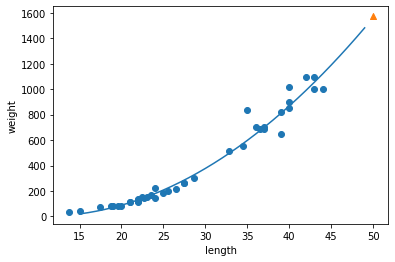

In [40]:
x = np.arange(15,50)
y = 1.01*x**2 - 21.6*x + 116.05
plt.scatter(train_input,train_target)
plt.plot(x,y) 
plt.scatter(50,1574,marker= '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [41]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9706807451768623
0.9775935108325122
